In [ ]:
# We'll use matrix decomposition from linear algebra to do some image processing


In [1]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
import matplotlib
from scipy import misc

In [4]:
img = misc.face()
# img = cv2.imread('face.png')


C:\Users\Student\AppData\Local\Temp\ipykernel_21128\1513486666.py:1: DeprecationWarning: scipy.misc.face has been deprecated in SciPy v1.10.0; and will be completely removed in SciPy v1.12.0. Dataset methods have moved into the scipy.datasets module. Use scipy.datasets.face instead.
  img = misc.face()


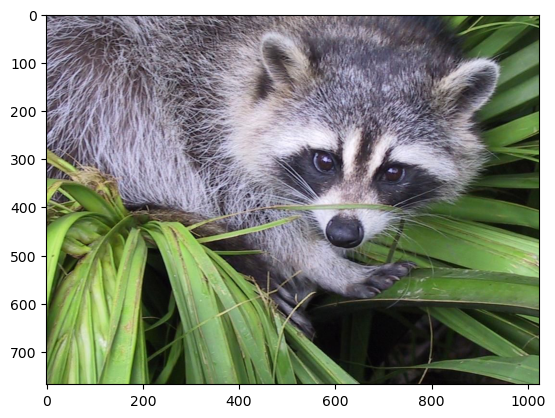

In [5]:
# show the image
plt.imshow(img)

In [6]:
# get the shape, axis and array properties
print(img.shape)
print(type(img))
print(img.ndim)

(768, 1024, 3)
<class 'numpy.ndarray'>
3


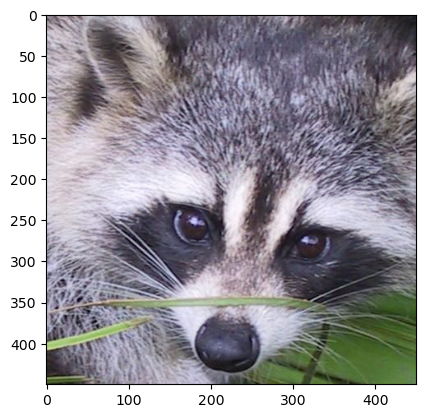

In [8]:
# crop the immage

cropped_image = img[50:500,400:850,:]
plt.imshow(cropped_image)

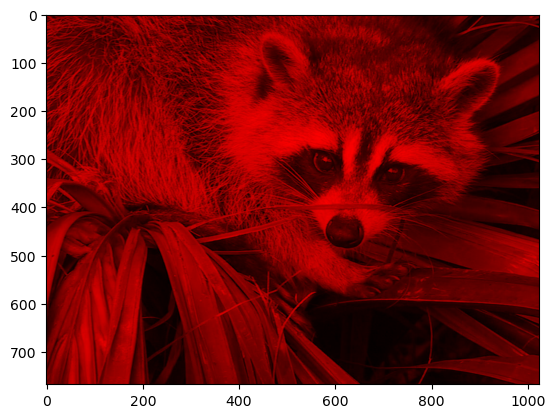

In [9]:
# the three dimensions represent the red green blue color channels of the image
# img[:,:,0] # red channel
# img[:,:,1] green channel
# img[:,:,2] blue 
rgb_image = np.zeros(img.shape, dtype="uint8")
rgb_image[:,:,0] = img[:,:,0]
plt.imshow(rgb_image)


0
1
2


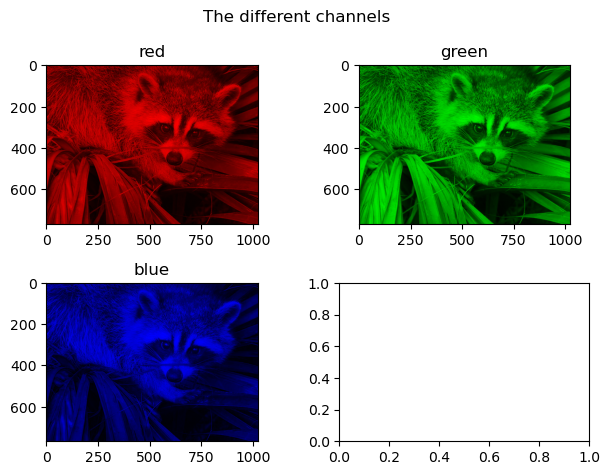

In [10]:
fig,axs = plt.subplots(2,2)
colors = ['red', 'green', 'blue']
for i in range(2):    
    for j in range(2):
        ax = axs[i,j]
        if i == 1 and j == 1:
            break
        c = i*2 + j
        print(c)
        rgb_image = np.zeros(img.shape, dtype="uint8")
        rgb_image[:,:,c] = img[:,:,c]
        ax.imshow(rgb_image)
        ax.set_title(colors[c])        

plt.suptitle("The different channels")
plt.tight_layout()

In [11]:
print(img.max(), img.min()) # max and min values in the image

255 0


In [12]:
# let's convert the values into floats for better linear algebra operations
# Normalizing...
img_array = img/255

In [13]:
print(img_array.max(), img_array.min(), img_array.dtype)

1.0 0.0 float64


In [14]:
# assign each color to a seperate matrix using array slicing

red_channel = img_array[:,:,0]
green_channel = img_array[:,:,1]
blue_channel = img_array[:,:,2]

In [ ]:
# from linear algebra, it's possible to approximate existing sets of data
# we'll use the SVF (Singular Value decomposition)
#SVD returns 3 matrices which can be multiplied to form a given matrix A
# U.S.V_transpose = A
#U and V are square, and S is same size as A
# S is a diagonal matrix and contains the singular values of A
# The values on the diagonal are always non-negative 
# and is an indicator of the importance of some features in A


In [15]:
# According to colorimetry you can obtain a grayscale image
# of a color image using the following formula
# Y = 0.2126R + 0.7152G + 0.0722B

# img_gray = img_array @ [0.2126, 0.7152, 0.0722]
img_gray=np.matmul(img_array,[0.2126, 0.7152, 0.0722])

In [16]:
img_gray.shape

(768, 1024)

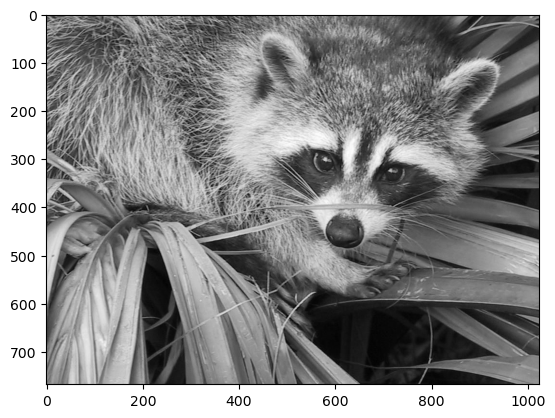

In [17]:
plt.imshow(img_gray, cmap='gray')

In [18]:
# applying the SVD to obtain the decomposition
U,s,Vt = np.linalg.svd(img_gray)

In [19]:
# let's confirm the shapes of the matrices
print(U.shape, s.shape, Vt.shape)

(768, 768) (768,) (1024, 1024)


In [20]:
# peculiar shape of s is for space saving. Let's reconstruct the original S matrix
Sigma = np.zeros((768,1024))
for i in range(768):
    Sigma[i,i] = s[i] # values are only in the diagonal


In [21]:
# how close is the reconstructed U . Sigma . Vt to original grayscale image?
# we can do check this using the norm of the difference

# print(np.linalg.norm(img_gray - U @ Sigma @ Vt))
print(np.linalg.norm(img_gray - np.matmul(np.matmul( U , Sigma) , Vt)))

1.3610579319035828e-12


Text(0.5, 1.0, 'SVD')

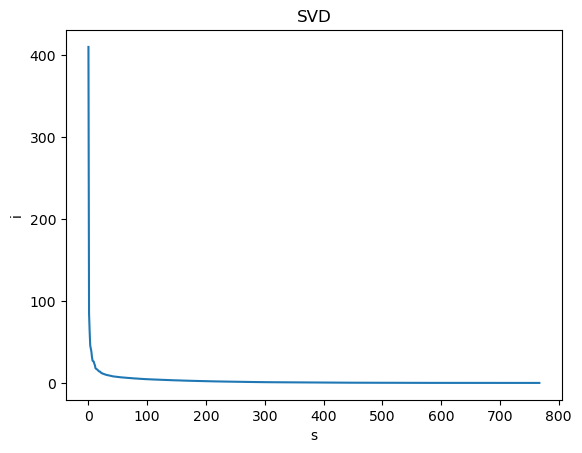

In [22]:
# Let's see which singular values are important in building an approximation for our image
plt.plot(s)
plt.xlabel('s')
plt.ylabel('i')
plt.title('SVD')

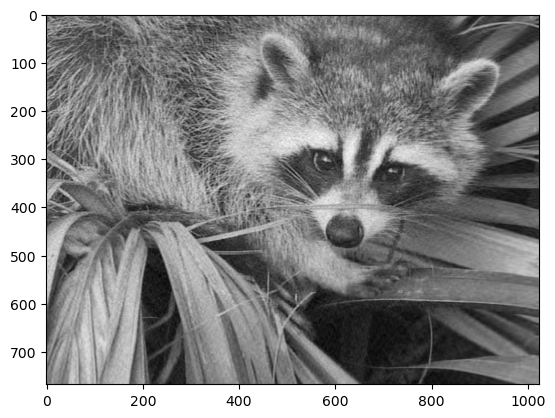

In [25]:
# the idea is to consider all but the first k singuular values in Sigma as 0 and keep U and Vt intact
# e.g k = 10

k = 100
approx = U @ Sigma[:,:k] @ Vt[:k,:]
plt.imshow(approx, cmap = 'gray')

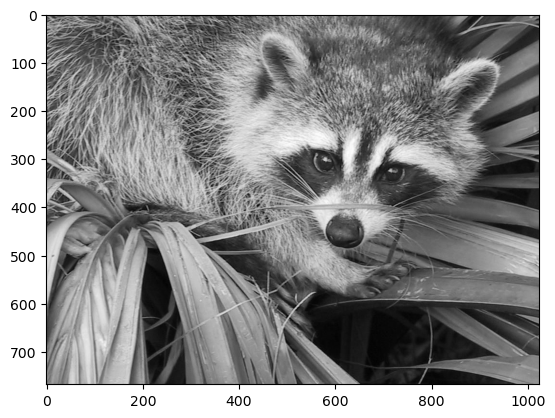

In [26]:
k = 768
approx = U @ Sigma[:,:k] @ Vt[:k,:]
plt.imshow(approx, cmap = 'gray')